In [1]:
devtools::install_github("langcog/childesr")



cli      (3.4.1 -> 3.5.0  ) [CRAN]
vctrs    (0.5.0 -> 0.5.1  ) [CRAN]
purrr    (0.3.5 -> 1.0.0  ) [CRAN]
RMySQL   (NA    -> 0.10.25) [CRAN]
jsonlite (1.8.3 -> 1.8.4  ) [CRAN]


Installing 5 packages: cli, vctrs, purrr, RMySQL, jsonlite

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpstKIsB/remotes105c1d0d982c/langcog-childesr-58695eb/DESCRIPTION’ ... OK
* preparing ‘childesr’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘childesr_0.2.3.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(childesr)
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
utt_items<- get_utterances(collection="Eng-NA")
  

Using current database version: '2021.1'.

Getting data from 1117 children in 57 corpora...



In [4]:
participants <- get_participants(collection = "Eng-NA")

Using current database version: '2021.1'.



In [5]:
transcripts <- get_transcripts(collection = "Eng-NA")

Using current database version: '2021.1'.



In [6]:
utt_copy<-data.frame(utt_items)
utt_copy<-utt_copy%>%subset(select = -c(actual_phonology,model_phonology,utterance_order,speaker_code,media_start:media_unit,collection_name,collection_id,language))

In [7]:
length(unique(utt_copy$transcript_id))
tail(utt_copy)

[1] 9381

,id,gloss,stem,type,num_morphemes,num_tokens,corpus_name,part_of_speech,speaker_name,speaker_role,target_child_name,target_child_age,target_child_sex,corpus_id,speaker_id,target_child_id,transcript_id
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<int>,<int>
3232918,17775242,lemme let me,,declarative,NA,3,Davis-CDI,,NAT,Target_Child,NAT,29.69055,male,340,23608,23608,44881
3232919,17775251,try try to,,declarative,NA,3,Davis-CDI,,NAT,Target_Child,NAT,29.69055,male,340,23608,23608,44881
3232920,17775265,wanna want to,,declarative,NA,3,Davis-CDI,,NAT,Target_Child,NAT,29.69055,male,340,23608,23608,44881
3232921,17775274,and,,declarative,NA,1,Davis-CDI,,NAT,Target_Child,NAT,29.69055,male,340,23608,23608,44881
3232922,17775282,balloon,,declarative,NA,1,Davis-CDI,,NAT,Target_Child,NAT,29.69055,male,340,23608,23608,44881
3232923,17775289,sun,,declarative,NA,1,Davis-CDI,,NAT,Target_Child,NAT,29.69055,male,340,23608,23608,44881


In [9]:
utt_trans <- utt_copy%>%left_join(transcripts, by = c("transcript_id"="transcript_id","target_child_name"="target_child_name","target_child_age"="target_child_age","target_child_sex"="target_child_sex","corpus_name"="corpus_name","target_child_id"="target_child_id","corpus_id"="corpus_id"))

In [15]:
#utt_trans <-utt_trans%>%subset(select = -c(collection_name,collection_id,language,filename,pid))
utt_trans$date <- utt_trans$date%>%replace(is.na(.), 0)
utt_trans <- utt_trans%>%filter(date != "0")

In [88]:
words_withnops <- utt_trans%>% subset(select = c(id,gloss,date,speaker_id))%>%
  separate_rows(gloss,sep = " ")%>%
   filter(gloss!= "")%>%
   filter(gloss!= " ")
 

In [92]:
speak_tot <- words_withnops%>%add_count(speaker_id)%>%
  rename("speaker_total"="n")

In [218]:
utt2<-utt_trans%>%filter(grepl("v|aux|cop|mod|inf|pro:per prep|pro:sub prep|pro:dem prep|pro:poss prep|pro:exist prep|pro:indef prep|pro:int prep|pro:obj prep|pro:rel prep|pro:refl prep",part_of_speech)|grepl("'s|'re|'d|like",gloss))

In [219]:
head(utt2)

,id,gloss,stem,type,num_morphemes,num_tokens,corpus_name,part_of_speech,speaker_name,speaker_role,target_child_name,target_child_age,target_child_sex,corpus_id,speaker_id,target_child_id,transcript_id,date
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<chr>
1,317356,at Parent Lastname's house with Child Lastname and it is March fourth I believe and when was Parent's birthday,at Parent Lastname house with Child Lastname and it be March fourth I believe and when be Parent,question,25,19,Valian,prep n:prop adj n prep n:prop n:prop coord pro:per cop n:prop n pro:sub v coord pro:int cop adj,NA,Investigator,NA,25.09908,female,35,1703,1702,3675,1986-03-04
2,317357,Child's,Child,imperative_emphatic,3,1,Valian,adj,NA,Mother,NA,25.09908,female,35,1704,1702,3675,1986-03-04
3,317359,that's okay,that okay,declarative,3,2,Valian,pro:dem adj,NA,Mother,NA,25.09908,female,35,1704,1702,3675,1986-03-04
4,317362,and she's two years old,and she two year old,declarative,7,5,Valian,coord pro:sub det:num n adj,NA,Investigator,NA,25.09908,female,35,1703,1702,3675,1986-03-04
5,317365,she just turned two a month ago,she just turn two a month ago,declarative,8,7,Valian,pro:sub adv part det:num det:art n post,NA,Mother,NA,25.09908,female,35,1704,1702,3675,1986-03-04
6,317366,do you know what a tape recorder is Child,do you know what a tape record be Child,question,12,9,Valian,mod pro:per v pro:int det:art n n cop n:prop,NA,Investigator,NA,25.09908,female,35,1703,1702,3675,1986-03-04


In [220]:
words_withnops <- utt2%>% subset(select = c(id,gloss,date,speaker_id))%>%
  separate_rows(gloss,sep = " ")%>%
   filter(gloss!= "")%>%
   filter(gloss!= " ")
 speak_tot <- words_withnops%>%add_count(speaker_id)%>%
  rename("speaker_total"="n")
 

In [223]:

words<-utt_trans%>%separate_rows(gloss,sep = " ")%>%
   filter(gloss!= "")%>%
   filter(gloss!= " ")

In [224]:
words<-words%>%filter(gloss == "like")

In [225]:
add_gloss <-utt_trans%>%subset(select = c(id,gloss,stem))
words<- words%>%left_join(add_gloss, by = c("id"="id","stem"="stem"))

In [226]:
words <- words%>%subset(select = c(id,gloss.x,gloss.y,stem,type,part_of_speech,speaker_role,date,target_child_age,speaker_id,corpus_id,transcript_id))

In [53]:
(words)

id,gloss.x,gloss.y,stem,type,part_of_speech,speaker_role,date,target_child_age,speaker_id,corpus_id,transcript_id
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>
317392,like,it doesn't look like mine but it writes,it do look like mine but it write,declarative,pro:per mod v conj n conj pro:per v,Mother,1986-03-04,25.09908,1704,35,3675
317434,like,a tape recorder it's like a radio,a tape record it like a radio,declarative,det:art n n pro:per conj det:art n,Mother,1987-10-16,21.69038,1704,35,3677
317436,like,you can listen to things on it like a radio,you can listen to thing on it like a radio,declarative,pro:per mod v prep n prep pro:per prep det:art n,Mother,1987-10-16,21.69038,1704,35,3677
317521,like,what do you think the birdie would like to eat,what do you think the bird will like to eat,question,pro:int mod pro:per v det:art n mod v inf v,Mother,1986-03-04,25.09908,1704,35,3675
317555,like,well I'd like to see what's in here,well I like to see what in here,declarative,co pro:sub v inf v pro:int prep n,Mother,1987-10-16,21.69038,1704,35,3677
317592,like,it looks just like that character in your book is there an xxx in your kitchen,it look just like that character in your book be there a in your kitchen,question,pro:per v adv prep pro:dem n prep det:poss n aux adv det:art prep det:poss n,Mother,1987-10-16,21.69038,1704,35,3677
317621,like,do you think your dolly would like to see the bird,do you think your doll will like to see the bird,question,mod pro:per v det:poss n mod v inf v det:art n,Mother,1986-03-04,25.09908,1704,35,3675
317685,like,what color do you like best,what color do you like good,question,pro:int n v pro:per v adj,Mother,1986-03-13,25.39477,1704,35,3676
317689,like,what color do you like best,what color do you like good,question,pro:int n v pro:per v adj,Mother,1986-03-13,25.39477,1704,35,3676


In [206]:
words_parts<-words%>%separate_rows(stem,part_of_speech,sep = " ")%>%
   filter(stem!= "")%>%
   filter(stem!= " ")%>%
   filter(stem == "like")

In [57]:
(words_parts)

id,gloss.x,gloss.y,stem,type,part_of_speech,speaker_role,date,target_child_age,speaker_id,corpus_id,transcript_id
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>
317392,like,it doesn't look like mine but it writes,like,declarative,conj,Mother,1986-03-04,25.09908,1704,35,3675
317434,like,a tape recorder it's like a radio,like,declarative,conj,Mother,1987-10-16,21.69038,1704,35,3677
317436,like,you can listen to things on it like a radio,like,declarative,prep,Mother,1987-10-16,21.69038,1704,35,3677
317521,like,what do you think the birdie would like to eat,like,question,v,Mother,1986-03-04,25.09908,1704,35,3675
317555,like,well I'd like to see what's in here,like,declarative,v,Mother,1987-10-16,21.69038,1704,35,3677
317592,like,it looks just like that character in your book is there an xxx in your kitchen,like,question,prep,Mother,1987-10-16,21.69038,1704,35,3677
317621,like,do you think your dolly would like to see the bird,like,question,v,Mother,1986-03-04,25.09908,1704,35,3675
317685,like,what color do you like best,like,question,v,Mother,1986-03-13,25.39477,1704,35,3676
317689,like,what color do you like best,like,question,v,Mother,1986-03-13,25.39477,1704,35,3676


In [227]:
be_like <- words%>%filter(grepl("he's like|she's like|I'm like|they're like|I am like|he is like|she is like|they are like|'s like|'re like|I was like|she was like|he was like|they were like|maybe like|were like|but like", gloss.y))%>%
  filter(!grepl("it's like|that's like", gloss.y))

In [228]:
(be_like)

id,gloss.x,gloss.y,stem,type,part_of_speech,speaker_role,date,target_child_age,speaker_id,corpus_id,transcript_id
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>
317956,like,the first one's like about a half hour,the first one like about a half hour,trail off,det:art adj adj co prep det:art qn n,Investigator,1986-01-30,21.65753,1703,35,3681
320766,like,I'm like this one or in this one,I like this one or in this one,declarative,pro:sub prep pro:dem pro:indef coord prep det:dem pro:indef,Target_Child,1988-09-06,30.72342,1702,35,3689
323997,like,it's only got three letters instead of the abc's like that has all the letters,it only get three letter instead of the abc like that have all the letter,declarative,pro:per adv part det:num n adv prep det:art n prep pro:rel v qn det:art n,Mother,1986-02-04,21.82180,1704,35,3682
327407,like,and I was like,and I be like,quotation next line,coord pro:sub cop prep,Mother,1986-07-28,27.65765,1704,35,3687
329137,like,those hot days she'll come out with all the blankets and throw them on me and I'm like,those hot day she come out with all the blanket and throw them on me and I like,quotation next line,det:dem adj n pro:sub v adv prep qn det:art n coord v pro:obj prep pro:obj coord pro:sub prep,Mother,1986-07-28,27.65765,1704,35,3687
329960,like,but like she doesn't know all her colors or her numbers and things,but like she do know all her color or her number and thing,declarative,conj conj pro:sub mod v qn det:poss n coord det:poss n coord n,Mother,1986-11-25,29.23058,1704,35,3694
332570,like,he's like a puppy,he like a puppy,declarative,pro:sub prep det:art n,Target_Child,1987-01-29,30.42773,1702,35,3698
336619,like,ever since he was like six months old,ever since he be like six month old,declarative,adv prep pro:sub cop co det:num n adj,Mother,1988-09-08,30.78913,1704,35,3692
339701,like,and maybe like,and maybe like,trail off,coord adv co,Investigator,1987-02-10,30.82199,1703,35,3699


In [229]:
be_like<-be_like%>% mutate(year = substr(date,0,4))%>%
   add_count(year)

In [230]:
be_like<- be_like%>%left_join(speak_tot, by = c("id"= "id","speaker_id"="speaker_id","gloss.x"="gloss","date"="date"))

In [231]:
be_like<-be_like%>%rename("year_total"="n")%>%
  add_count(speaker_id)%>%
  rename("speak_likes"="n")%>%
  subset(select = c(id,gloss.x,gloss.y,stem,part_of_speech,speaker_role,date,speaker_id,transcript_id,year,year_total,speaker_total,speak_likes))

In [239]:
be_like_time<- be_like%>%mutate(per_thou_part = (speak_likes/speaker_total)*1000)

In [233]:
(be_like_time)

id,gloss.x,gloss.y,stem,part_of_speech,speaker_role,date,speaker_id,transcript_id,year,year_total,speaker_total,speak_likes,per_thou_part
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<dbl>
317956,like,the first one's like about a half hour,the first one like about a half hour,det:art adj adj co prep det:art qn n,Investigator,1986-01-30,1703,3681,1986,8,21859,2,91.49549
320766,like,I'm like this one or in this one,I like this one or in this one,pro:sub prep pro:dem pro:indef coord prep det:dem pro:indef,Target_Child,1988-09-06,1702,3689,1988,15,26706,2,74.88954
323997,like,it's only got three letters instead of the abc's like that has all the letters,it only get three letter instead of the abc like that have all the letter,pro:per adv part det:num n adv prep det:art n prep pro:rel v qn det:art n,Mother,1986-02-04,1704,3682,1986,8,83377,6,71.96229
327407,like,and I was like,and I be like,coord pro:sub cop prep,Mother,1986-07-28,1704,3687,1986,8,83377,6,71.96229
329137,like,those hot days she'll come out with all the blankets and throw them on me and I'm like,those hot day she come out with all the blanket and throw them on me and I like,det:dem adj n pro:sub v adv prep qn det:art n coord v pro:obj prep pro:obj coord pro:sub prep,Mother,1986-07-28,1704,3687,1986,8,83377,6,71.96229
329960,like,but like she doesn't know all her colors or her numbers and things,but like she do know all her color or her number and thing,conj conj pro:sub mod v qn det:poss n coord det:poss n coord n,Mother,1986-11-25,1704,3694,1986,8,83377,6,71.96229
332570,like,he's like a puppy,he like a puppy,pro:sub prep det:art n,Target_Child,1987-01-29,1702,3698,1987,12,26706,2,74.88954
336619,like,ever since he was like six months old,ever since he be like six month old,adv prep pro:sub cop co det:num n adj,Mother,1988-09-08,1704,3692,1988,15,83377,6,71.96229
339701,like,and maybe like,and maybe like,coord adv co,Investigator,1987-02-10,1703,3699,1987,12,21859,2,91.49549


In [240]:
be_like_time<-be_like_time%>%mutate(speaker_type = case_when(speaker_role =="Target_Child"|speaker_role =="Brother"|speaker_role =="Child"|speaker_role =="Sister"|speaker_role =="Playmate"~"child",TRUE ~ "adult"))

In [250]:
Mode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}

In [251]:
be_like_time<-be_like_time%>%
  group_by(year)%>%
  group_by(speaker_type,.add=TRUE)%>%
  mutate(pt_mean_time = Mode(per_thou_part))%>%
  mutate(pt_stdev_time = sd(per_thou_part))

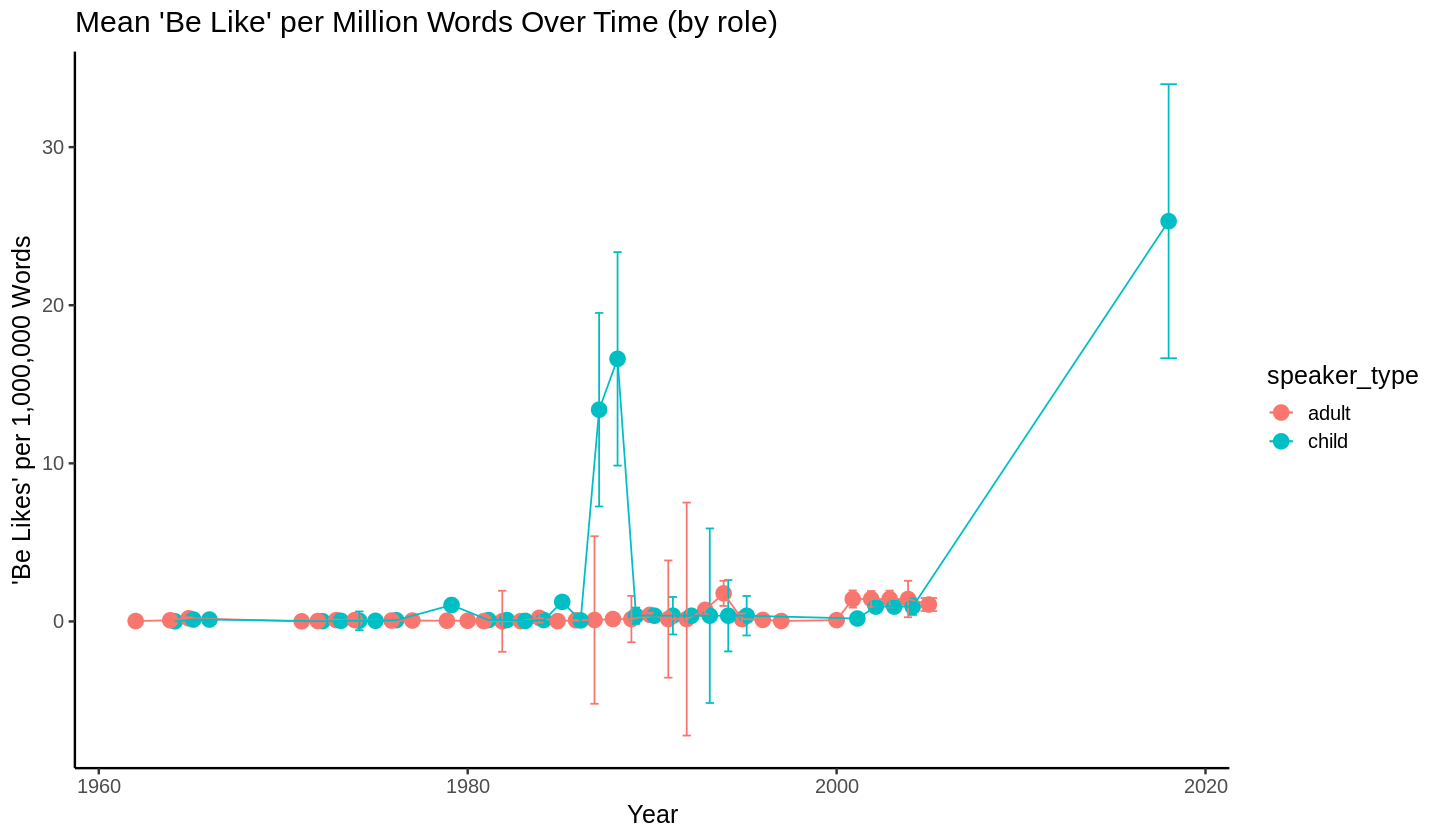

In [252]:
theme_set(theme_classic(base_size = 15))
options(repr.plot.height = 7, repr.plot.width = 12)
be_like_time$year<- as.numeric(as.character(be_like_time$year))
be_like_time1<- unique(be_like_time[c("year","speaker_type","pt_mean_time","pt_stdev_time")])
ggplot(be_like_time1,aes(x=year,y=pt_mean_time,group = speaker_type))+
  geom_point(aes(color =speaker_type),size = 4,position =  position_dodge(width = 0.5))+
  geom_errorbar(aes(ymin=pt_mean_time-pt_stdev_time,ymax=pt_mean_time+pt_stdev_time,color =speaker_type),position =  position_dodge(width = 0.5))+
  geom_line(aes(color = speaker_type),position = position_dodge(width = 0.5))+
  labs(x = "Year", y= "'Be Likes' per 1,000,000 Words", title ="Mean 'Be Like' per Million Words Over Time (by role)")

`geom_smooth()` using formula = 'y ~ x'


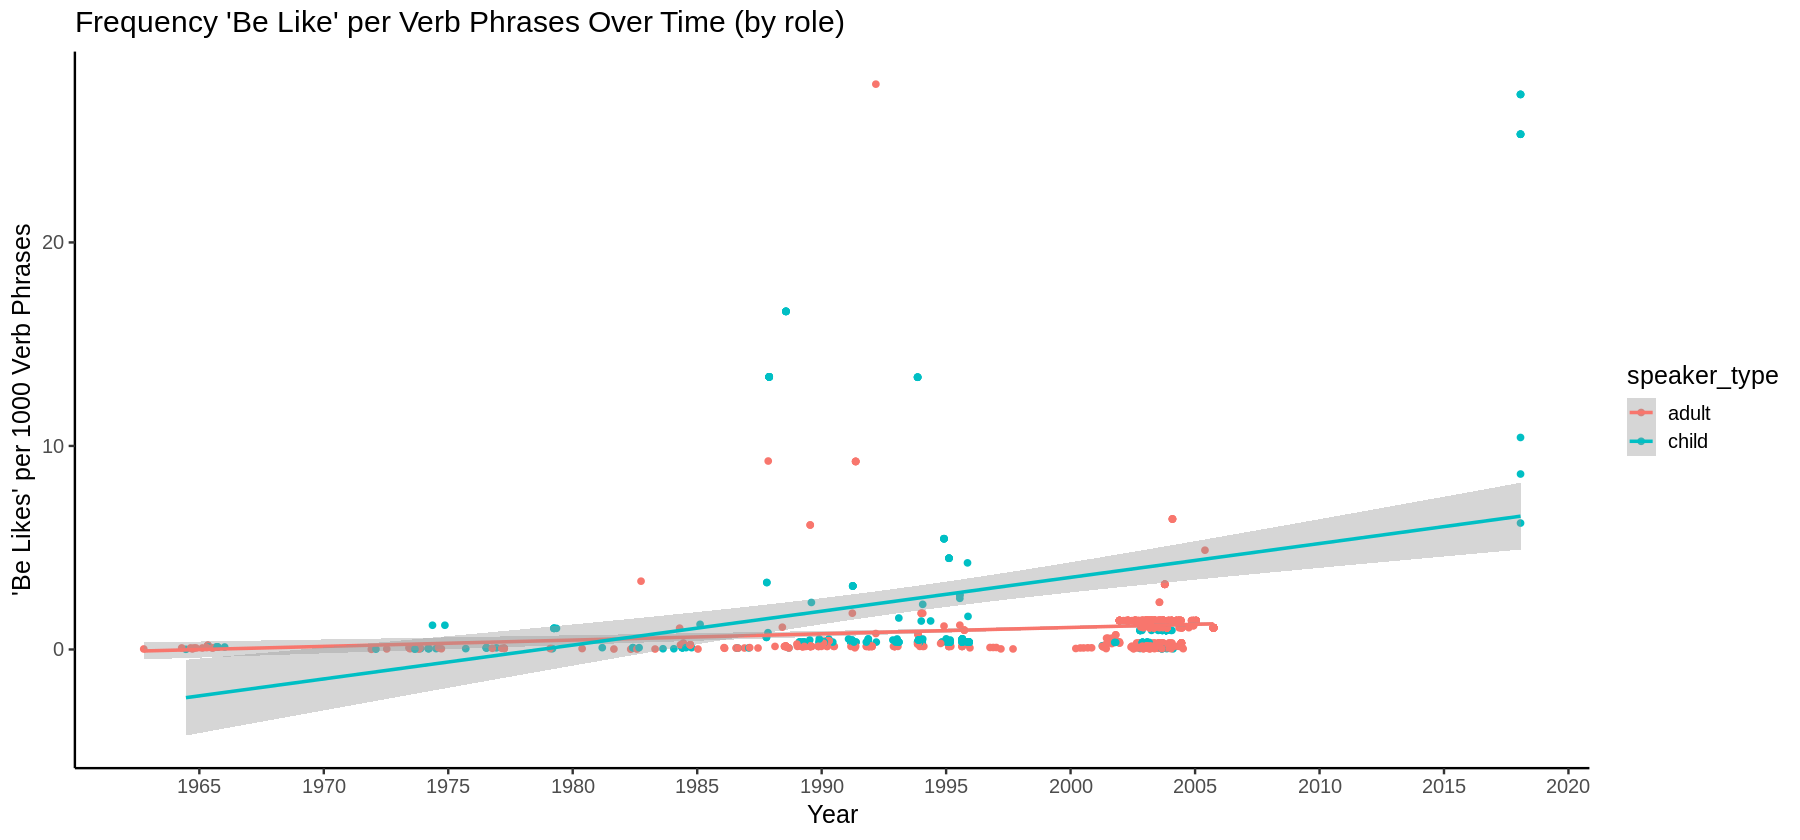

In [254]:
options(repr.plot.height = 7, repr.plot.width = 15)
be_like2 <- data.frame(be_like_time)
be_like2$date<-as.Date(be_like2$date)
ggplot(be_like2,aes(x=date,y=per_thou_part,group = speaker_type))+
  geom_point(aes(color = speaker_type),position = position_jitter())+
  #stat_smooth(method = lm,aes(color = speaker_type))+
  geom_smooth( aes ( color = speaker_type),method = lm)+
  scale_x_date(date_breaks = "5 years", date_labels = "%Y",date_minor_breaks = "1 year")+
  labs(x = "Year", y= "'Be Likes' per 1000 Verb Phrases", title ="Frequency 'Be Like' per Verb Phrases Over Time (by role)")

In [ ]:
d3<-data.frame(utt_copy)
d3<-d3%>%
  subset(select = -c(type:corpus_name,speaker_name,speaker_role,speaker_id,corpus_id,target_child_sex,target_child_name))%>%
  subset(part_of_speech!="bab"
  &part_of_speech!="co"&part_of_speech!="neo"&part_of_speech!="chi"
  &part_of_speech!="sing"&part_of_speech!="wplay"
  &part_of_speech!="on"&part_of_speech!="L2"&part_of_speech!="uni"&part_of_speech!="fam"
  &part_of_speech!="phon"&part_of_speech!="unk"&part_of_speech!="test"&part_of_speech!="dia"&part_of_speech!="n:let")
nrow(d3)
nrow(utt_copy)

[1] 614646

[1] 701672

In [ ]:
dd<-data.frame(d3)
dd<-dd%>%separate_rows(gloss,sep = " ")%>%
   filter(gloss!= "")%>%
   filter(gloss != " ")


In [ ]:
gloss_count<-count(dd,gloss)
newdd<-data.frame(right_join(dd,gloss_count,by = "gloss"))


In [ ]:
kid_counter<-data.frame(dd)
kid_counter<-kid_counter%>%
  subset(select = -c(stem,id,part_of_speech,target_child_age,transcript_id))%>%
  distinct(.keep_all=TRUE)
kcount<-count(kid_counter,gloss)
kid_counter<-kid_counter%>%
  right_join(kcount,by = "gloss")%>%
  rename( CDCount = n)%>%
  subset(select = -c(target_child_id))%>%
  distinct(gloss,.keep_all=TRUE)
head(kid_counter)


,gloss,CDCount
,<chr>,<int>
1,tape,53
2,it,331
3,up,210
4,and,195
5,two,178
6,players,1


In [ ]:
newdd<-newdd%>%distinct(gloss,.keep_all = TRUE)
 

In [ ]:
plus_cd<-data.frame(right_join(newdd,kid_counter,by= "gloss"))
(plus_cd)

id,gloss,stem,part_of_speech,target_child_age,target_child_id,transcript_id,n,CDCount
<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>
317368,tape,tape it up and two tape play,v pro:per adv coord det:num n n,25.09908,1702,3675,1059,53
317368,it,tape it up and two tape play,v pro:per adv coord det:num n n,25.09908,1702,3675,25728,331
317368,up,tape it up and two tape play,v pro:per adv coord det:num n n,25.09908,1702,3675,7228,210
317368,and,tape it up and two tape play,v pro:per adv coord det:num n n,25.09908,1702,3675,16864,195
317368,two,tape it up and two tape play,v pro:per adv coord det:num n n,25.09908,1702,3675,4069,178
317368,players,tape it up and two tape play,v pro:per adv coord det:num n n,25.09908,1702,3675,1,1
317370,have,have a old tape play new tape play,v det:art adj n n adj n n,25.09908,1702,3675,5117,168
317370,a,have a old tape play new tape play,v det:art adj n n adj n n,25.09908,1702,3675,35352,326
317370,old,have a old tape play new tape play,v det:art adj n n adj n n,25.09908,1702,3675,256,44


In [ ]:
length(unique(dd$target_child_id))

[1] 761

In [ ]:
plus_cd<-plus_cd%>% 
mutate(CDlog = ((log10((CDCount/761)+1))*100))

In [ ]:
stims_list=  read.csv(file = '/stim_list.csv')

In [ ]:
head(stims_list)

In [ ]:
stim2= data.frame(left_join(stims_list,plus_cd, by = c("words" = "gloss")))

In [ ]:
(stim2)

In [ ]:
write.csv(stim2,"stim2.csv", row.names =TRUE)

In [ ]:
withp<- get_utterances(collection="Eng-NA")%>%
  filter (target_child_age <= 36)%>%
  subset(part_of_speech!="bab"
  &part_of_speech!="co"&part_of_speech!="neo"&part_of_speech!="chi"
  &part_of_speech!="sing"&part_of_speech!="wplay"
  &part_of_speech!="on"&part_of_speech!="L2"&part_of_speech!="uni"&part_of_speech!="fam"
  &part_of_speech!="phon"&part_of_speech!="unk"&part_of_speech!="test"&part_of_speech!="dia"&part_of_speech!="n:let")

Using current database version: '2021.1'.

Getting data from 1117 children in 57 corpora...



In [ ]:
head(withp)

id,gloss,stem,actual_phonology,model_phonology,type,language,num_morphemes,num_tokens,utterance_order,⋯,target_child_sex,media_start,media_end,media_unit,collection_name,collection_id,corpus_id,speaker_id,target_child_id,transcript_id
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,⋯,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
317356,at Parent Lastname's house with Child Lastname and it is March fourth I believe and when was Parent's birthday,at Parent Lastname house with Child Lastname and it be March fourth I believe and when be Parent,,,question,eng,25,19,1,⋯,female,NA,NA,NA,Eng-NA,2,35,1703,1702,3675
317357,Child's,Child,,,imperative_emphatic,eng,3,1,2,⋯,female,NA,NA,NA,Eng-NA,2,35,1704,1702,3675
317358,oh I'm sorry,oh I sorry,,,declarative,eng,4,3,3,⋯,female,NA,NA,NA,Eng-NA,2,35,1703,1702,3675
317359,that's okay,that okay,,,declarative,eng,3,2,4,⋯,female,NA,NA,NA,Eng-NA,2,35,1704,1702,3675
317360,February first nineteen eighty four,February first nineteen eighty four,,,declarative,eng,5,5,5,⋯,female,NA,NA,NA,Eng-NA,2,35,1704,1702,3675
317361,great,great,,,declarative,eng,1,1,6,⋯,female,NA,NA,NA,Eng-NA,2,35,1703,1702,3675


In [ ]:
pcopy<-data.frame(withp)
pcopy<-pcopy%>%subset(select = -c(actual_phonology,model_phonology,num_morphemes:utterance_order,speaker_code,media_start:corpus_id,language))

In [ ]:
dp<-data.frame(pcopy)
dp<-dp%>%separate_rows(gloss,sep = " ")%>%
   filter(gloss!= "")%>%
   filter(gloss != " ")

gloss_count2<-count(dp,gloss)
newddd<-data.frame(right_join(dp,gloss_count2,by = "gloss"))

In [ ]:
kid_counter2<-data.frame(dp)
kid_counter2<-kid_counter2%>%
  subset(select = -c(stem,id,part_of_speech,target_child_age,transcript_id,speaker_role,speaker_name,speaker_id,type,corpus_name,target_child_sex,target_child_name))%>%
  distinct(.keep_all=TRUE)
tail(kid_counter2)

,gloss,target_child_id
,<chr>,<int>
426466,is,23608
426467,lemme,23608
426468,let,23608
426469,try,23608
426470,want,23608
426471,and,23608


In [ ]:
kcount2<-count(kid_counter2,gloss)
kid_counter2<-kid_counter2%>%
  right_join(kcount2,by = "gloss")%>%
  rename( CDCount = n)%>%
  subset(select = -c(target_child_id))%>%
  distinct(gloss,.keep_all=TRUE)
tail(kid_counter2)

,gloss,CDCount
,<chr>,<int>
36401,nooo,1
36402,'rnnnn',1
36403,Janis,1
36404,buttocks,5
36405,refridgerator,3
36406,allgone,4


In [ ]:
newddd<-newddd%>%distinct(gloss,.keep_all = TRUE)
plus_cd2<-data.frame(right_join(newddd,kid_counter2,by= "gloss"))
(plus_cd2)
length(unique(dp$target_child_id))

id,gloss,stem,type,corpus_name,part_of_speech,speaker_name,speaker_role,target_child_name,target_child_age,target_child_sex,speaker_id,target_child_id,transcript_id,n,CDCount
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>
317356,at,at Parent Lastname house with Child Lastname and it be March fourth I believe and when be Parent,question,Valian,prep n:prop adj n prep n:prop n:prop coord pro:per cop n:prop n pro:sub v coord pro:int cop adj,NA,Investigator,NA,25.09908,female,1703,1702,3675,22475,785
317356,Parent,at Parent Lastname house with Child Lastname and it be March fourth I believe and when be Parent,question,Valian,prep n:prop adj n prep n:prop n:prop coord pro:per cop n:prop n pro:sub v coord pro:int cop adj,NA,Investigator,NA,25.09908,female,1703,1702,3675,67,1
317356,Lastname's,at Parent Lastname house with Child Lastname and it be March fourth I believe and when be Parent,question,Valian,prep n:prop adj n prep n:prop n:prop coord pro:per cop n:prop n pro:sub v coord pro:int cop adj,NA,Investigator,NA,25.09908,female,1703,1702,3675,2,1
317356,house,at Parent Lastname house with Child Lastname and it be March fourth I believe and when be Parent,question,Valian,prep n:prop adj n prep n:prop n:prop coord pro:per cop n:prop n pro:sub v coord pro:int cop adj,NA,Investigator,NA,25.09908,female,1703,1702,3675,6141,315
317356,with,at Parent Lastname house with Child Lastname and it be March fourth I believe and when be Parent,question,Valian,prep n:prop adj n prep n:prop n:prop coord pro:per cop n:prop n pro:sub v coord pro:int cop adj,NA,Investigator,NA,25.09908,female,1703,1702,3675,27722,788
317356,Child,at Parent Lastname house with Child Lastname and it be March fourth I believe and when be Parent,question,Valian,prep n:prop adj n prep n:prop n:prop coord pro:per cop n:prop n pro:sub v coord pro:int cop adj,NA,Investigator,NA,25.09908,female,1703,1702,3675,894,5
317356,Lastname,at Parent Lastname house with Child Lastname and it be March fourth I believe and when be Parent,question,Valian,prep n:prop adj n prep n:prop n:prop coord pro:per cop n:prop n pro:sub v coord pro:int cop adj,NA,Investigator,NA,25.09908,female,1703,1702,3675,70,9
317356,and,at Parent Lastname house with Child Lastname and it be March fourth I believe and when be Parent,question,Valian,prep n:prop adj n prep n:prop n:prop coord pro:per cop n:prop n pro:sub v coord pro:int cop adj,NA,Investigator,NA,25.09908,female,1703,1702,3675,83850,810
317356,it,at Parent Lastname house with Child Lastname and it be March fourth I believe and when be Parent,question,Valian,prep n:prop adj n prep n:prop n:prop coord pro:per cop n:prop n pro:sub v coord pro:int cop adj,NA,Investigator,NA,25.09908,female,1703,1702,3675,114718,837


[1] 854

In [ ]:
plus_cd2<-plus_cd2%>% 
mutate(CDlog = ((log10((CDCount/854)+1))*100))%>%
mutate(percent= (CDCount/854))

In [ ]:
xx<-plus_cd2%>%filter(gloss == "camera")
head(xx)

,id,gloss,stem,type,corpus_name,part_of_speech,speaker_name,speaker_role,target_child_name,target_child_age,target_child_sex,speaker_id,target_child_id,transcript_id,n,CDCount,CDlog,percent
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,320852,camera,we have a video camera and so Child be on tv a lot,declarative,Valian,pro:sub v det:art n n coord co adj cop prep n det:art n,NA,Mother,NA,27.49338,female,1704,1702,3686,938,109,5.216842,0.1276347


In [ ]:
(plus_cd2)

id,gloss,stem,type,corpus_name,part_of_speech,speaker_name,speaker_role,target_child_name,target_child_age,target_child_sex,speaker_id,target_child_id,transcript_id,n,CDCount,CDlog,percent
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
317356,at,at Parent Lastname house with Child Lastname and it be March fourth I believe and when be Parent,question,Valian,prep n:prop adj n prep n:prop n:prop coord pro:per cop n:prop n pro:sub v coord pro:int cop adj,NA,Investigator,NA,25.09908,female,1703,1702,3675,22475,785,28.3121083,0.919203747
317356,Parent,at Parent Lastname house with Child Lastname and it be March fourth I believe and when be Parent,question,Valian,prep n:prop adj n prep n:prop n:prop coord pro:per cop n:prop n pro:sub v coord pro:int cop adj,NA,Investigator,NA,25.09908,female,1703,1702,3675,67,1,0.0508244,0.001170960
317356,Lastname's,at Parent Lastname house with Child Lastname and it be March fourth I believe and when be Parent,question,Valian,prep n:prop adj n prep n:prop n:prop coord pro:per cop n:prop n pro:sub v coord pro:int cop adj,NA,Investigator,NA,25.09908,female,1703,1702,3675,2,1,0.0508244,0.001170960
317356,house,at Parent Lastname house with Child Lastname and it be March fourth I believe and when be Parent,question,Valian,prep n:prop adj n prep n:prop n:prop coord pro:per cop n:prop n pro:sub v coord pro:int cop adj,NA,Investigator,NA,25.09908,female,1703,1702,3675,6141,315,13.6356640,0.368852459
317356,with,at Parent Lastname house with Child Lastname and it be March fourth I believe and when be Parent,question,Valian,prep n:prop adj n prep n:prop n:prop coord pro:per cop n:prop n pro:sub v coord pro:int cop adj,NA,Investigator,NA,25.09908,female,1703,1702,3675,27722,788,28.3915282,0.922716628
317356,Child,at Parent Lastname house with Child Lastname and it be March fourth I believe and when be Parent,question,Valian,prep n:prop adj n prep n:prop n:prop coord pro:per cop n:prop n pro:sub v coord pro:int cop adj,NA,Investigator,NA,25.09908,female,1703,1702,3675,894,5,0.2535293,0.005854801
317356,Lastname,at Parent Lastname house with Child Lastname and it be March fourth I believe and when be Parent,question,Valian,prep n:prop adj n prep n:prop n:prop coord pro:per cop n:prop n pro:sub v coord pro:int cop adj,NA,Investigator,NA,25.09908,female,1703,1702,3675,70,9,0.4552925,0.010538642
317356,and,at Parent Lastname house with Child Lastname and it be March fourth I believe and when be Parent,question,Valian,prep n:prop adj n prep n:prop n:prop coord pro:per cop n:prop n pro:sub v coord pro:int cop adj,NA,Investigator,NA,25.09908,female,1703,1702,3675,83850,810,28.9695451,0.948477752
317356,it,at Parent Lastname house with Child Lastname and it be March fourth I believe and when be Parent,question,Valian,prep n:prop adj n prep n:prop n:prop coord pro:per cop n:prop n pro:sub v coord pro:int cop adj,NA,Investigator,NA,25.09908,female,1703,1702,3675,114718,837,29.6685737,0.980093677


In [ ]:
stim3= data.frame(left_join(stims_list,plus_cd2, by = c("words" = "gloss")))

ERROR: ignored

In [ ]:
write.csv(stim3,"stim4.csv", row.names =TRUE)

In [ ]:
stems_list=  read.csv(file = '/stem_list.csv')

In [ ]:
stem= data.frame(left_join(stems_list,plus_cd2, by = c("play" = "gloss")))

In [ ]:
write.csv(stem,"stem.csv", row.names =TRUE)

In [ ]:
percent_list=  read.csv(file = '/percentlist.csv')
per= data.frame(left_join(percent_list,plus_cd2, by = c("words" = "gloss")))
write.csv(per,"percentlist2.csv", row.names =TRUE)

In [ ]:
top_words<-data.frame(plus_cd2[order(plus_cd2$percent, decreasing = TRUE),])
head(top_words)

,id,gloss,stem,type,corpus_name,part_of_speech,speaker_name,speaker_role,target_child_name,target_child_age,target_child_sex,speaker_id,target_child_id,transcript_id,n,CDCount,CDlog,percent
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
88,317390,that,you can write on that if you want,declarative,Valian,pro:per mod v prep pro:dem conj pro:per v,NA,Investigator,NA,25.09908,female,1703,1702,3675,97178,839,29.71991,0.9824356
43,317366,you,do you know what a tape record be Child,question,Valian,mod pro:per v pro:int det:art n n cop n:prop,NA,Investigator,NA,25.09908,female,1703,1702,3675,213532,838,29.69425,0.9812646
9,317356,it,at Parent Lastname house with Child Lastname and it be March fourth I believe and when be Parent,question,Valian,prep n:prop adj n prep n:prop n:prop coord pro:per cop n:prop n pro:sub v coord pro:int cop adj,NA,Investigator,NA,25.09908,female,1703,1702,3675,114718,837,29.66857,0.9800937
39,317365,a,she just turn two a month ago,declarative,Valian,pro:sub adv part det:num det:art n post,NA,Mother,NA,25.09908,female,1704,1702,3675,141524,833,29.56572,0.9754098
113,317397,the,Investigator will let you look in the bag,declarative,Valian,n:prop mod v pro:per v prep det:art n,NA,Mother,NA,25.09908,female,1704,1702,3675,189062,833,29.56572,0.9754098
45,317366,what,do you know what a tape record be Child,question,Valian,mod pro:per v pro:int det:art n n cop n:prop,NA,Investigator,NA,25.09908,female,1703,1702,3675,78125,830,29.48842,0.9718970


In [ ]:
top_words<-top_words%>%subset(select=-c(id,type:transcript_id))
head(top_words)


,gloss,stem,n,CDCount,CDlog,percent
,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>
88,that,you can write on that if you want,97178,839,29.71991,0.9824356
43,you,do you know what a tape record be Child,213532,838,29.69425,0.9812646
9,it,at Parent Lastname house with Child Lastname and it be March fourth I believe and when be Parent,114718,837,29.66857,0.9800937
39,a,she just turn two a month ago,141524,833,29.56572,0.9754098
113,the,Investigator will let you look in the bag,189062,833,29.56572,0.9754098
45,what,do you know what a tape record be Child,78125,830,29.48842,0.9718970


In [ ]:
top_20<-data.frame(top_words%>%filter(percent >= 0.2))
(top_20)

gloss,stem,n,CDCount,CDlog,percent
<chr>,<chr>,<int>,<int>,<dbl>,<dbl>
that,you can write on that if you want,97178,839,29.71991,0.9824356
you,do you know what a tape record be Child,213532,838,29.69425,0.9812646
it,at Parent Lastname house with Child Lastname and it be March fourth I believe and when be Parent,114718,837,29.66857,0.9800937
a,she just turn two a month ago,141524,833,29.56572,0.9754098
the,Investigator will let you look in the bag,189062,833,29.56572,0.9754098
what,do you know what a tape record be Child,78125,830,29.48842,0.9718970
I,at Parent Lastname house with Child Lastname and it be March fourth I believe and when be Parent,108716,829,29.46262,0.9707260
this,this be Saturday April nineteen,63449,829,29.46262,0.9707260
is,at Parent Lastname house with Child Lastname and it be March fourth I believe and when be Parent,73301,822,29.28161,0.9625293


In [ ]:
write.csv(top_20,"top_20.csv", row.names =TRUE)